<a href="https://colab.research.google.com/github/wayne4918/Machine_Learning_Practice/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#지도학습

#Linear_Regression_Practice

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the diabetes dataset
# 데이터 셋 열기
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
# 단일 특징 사용하기
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
# 데이터셋을 훈련용과 테스트용으로 나누기
# 마지막 20개는 테스트 , 나머지는 훈련용

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
#linear regression 객체 생성 및 훈련하기

regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

#예측
diabetes_y_pred = regr.predict(diabetes_X_test)

#모델 성능 평가
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))



Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


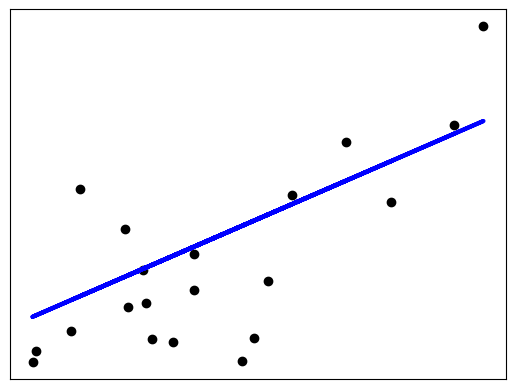

In [ ]:
# 결과 시각화 해보기


plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()


변수가 부족해서 그렇게 높은 예측력을 띄고 있진 않다


#Logistic Regression Practice

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


C=1.00
Sparsity with L1 penalty:                4.69%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                31.25%
Sparsity with Elastic-Net penalty:       12.50%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


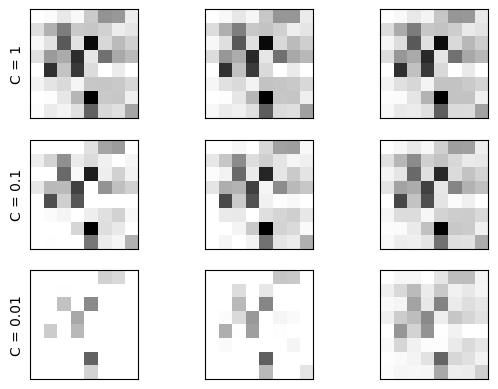

In [11]:
#데이터 셋 로드 및 전처리

X, y = datasets.load_digits(return_X_y=True)
X = StandardScaler().fit_transform(X)
y = (y > 4).astype(int)

#하이퍼파라미터 설정
l1_ratio = 0.5  # Elastic-Net 정규화에서 L1의 가중치

#모델 훈련 및 평가
fig, axes = plt.subplots(3, 3)
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
    )
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

#모델 평가 및 결과 출력
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100
    print(f"C={C:.2f}")
    print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:.2f}%")
    print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
    print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
    print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(X, y):.2f}")
    print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(X, y):.2f}")
    print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(X, y):.2f}")


# 결과 시각화

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())
    axes_row[0].set_ylabel(f"C = {C}")
plt.show()


#Decision_Tree_Practice


In [13]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [14]:
#아이리스 데이터셋 로드
iris = load_iris()
#행렬 X와 벡터Y 추출하기
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#의사 결정 트리 분류기 생성 및 학습하
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [15]:
#트리 속성 추출하기
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

# 노드 깊이, 리프 노드 여부 초기화 하기
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
# 트리 탐색하기
while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    is_split_node = children_left[node_id] != children_right[node_id]
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True
# 트리 구조 출력하기

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )


The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node with value=[[37. 34. 41.]]: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node with value=[[37.  0.  0.]].
	node=2 is a split node with value=[[ 0. 34. 41.]]: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 is a leaf node with value=[[ 0. 33.  3.]].
		node=4 is a leaf node with value=[[ 0.  1. 38.]].
